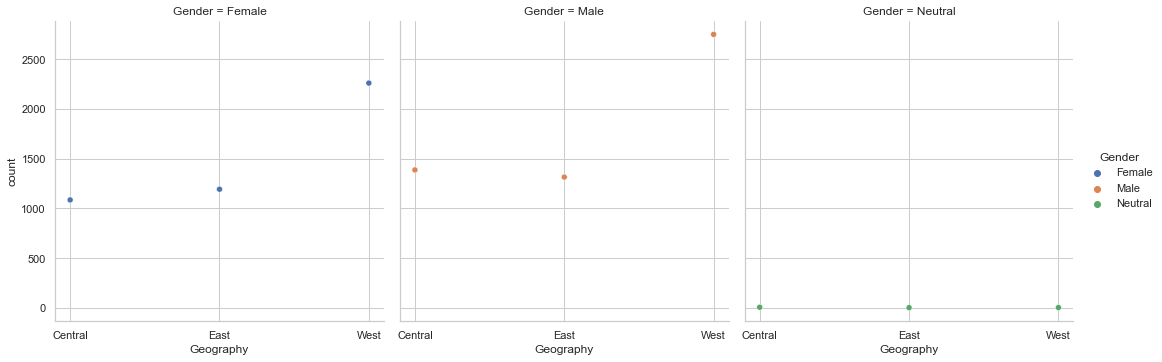

In [70]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

customer_attrition_status = pd.read_csv('Customer Data/Customer Attrition Status.csv')
customer_demographics = pd.read_csv('Customer Data/Customer Demographics.csv')
customer_investment_snapshot = pd.read_csv('Customer Data/Customer Investment Snapshot.csv')
customer_portfolio_snapshot = pd.read_csv('Customer Data/Customer Portfolio Snapshot.csv')

dataframe1 = pd.merge(customer_attrition_status,
                      customer_demographics[['CustomerId','Surname',
                      'Geography','Gender','Age']],on='CustomerId')
dataframe2 = pd.merge(dataframe1,customer_investment_snapshot[[
    'CustomerId','Tenure','CreditScore','EstimatedSalary','Balance']],on='CustomerId')
dataframe3 = pd.merge(dataframe2,customer_portfolio_snapshot[[
    'CustomerId','NumOfProducts','HasChckng','IsActiveMember']],on='CustomerId')
dataframe4=dataframe3.drop_duplicates()
convertdict = {'RowNumber':int,'CustomerId':int,'Surname':'string',
               'CreditScore':int,'Geography':'string',
               'Gender':'string','Age':int,'Tenure':int,'Balance':float,
               'NumOfProducts':int,'HasChckng':int,'IsActiveMember':int,
               'EstimatedSalary':float,'Exited':int}
dataframe5 = dataframe4[['RowNumber','CustomerId','Surname','CreditScore',
                         'Geography','Gender','Age','Tenure','Balance',
                         'NumOfProducts','HasChckng','IsActiveMember',
                         'EstimatedSalary','Exited']]

dataframe5['Balance']=dataframe5['Balance'].fillna(dataframe5['Balance'].mean())
dataframe5['CreditScore']=dataframe5['CreditScore'].fillna(dataframe5['CreditScore'].mean())

dataframe6=dataframe5.astype(convertdict)
dataframe6.set_index('RowNumber',inplace=True)

### how many users are from different zones ####
dataframe7=dataframe6.groupby(['Geography']).CustomerId.count().reset_index(name="count")
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(dataframe7['count'],explode=explode,  labels=dataframe7['Geography'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
dataframe7.plot.pie(y="count",subplots=True,figsize=(11, 6))

### how many users exited from different geography ###
dataframe8=dataframe6[['Geography','Exited','Gender']].groupby(['Geography','Exited','Gender']).size().reset_index(name="count")
sns.set_theme(style="whitegrid")
sns.catplot(x="Geography",y="count",hue="Exited",kind="bar",data=dataframe8)
sns.catplot(x="Gender",y="count",hue="Exited",kind="bar",data=dataframe8)



### how many male and female exited from different category ###
sns.relplot(data=dataframe8,x='Geography',y='count',hue='Exited',col="Gender")



### number of products available gender wise and geography wise
dataframe9=dataframe6.groupby(['Geography','Gender']).NumOfProducts.size().reset_index(name="count")
sns.relplot(data=dataframe9,x='Geography',y='count',hue='Gender',col="Gender")

### How many of are active and Non Active Members in the service which are not exited ###
dataframe10=dataframe6[(dataframe6.Exited==1)].groupby(['IsActiveMember']).CustomerId.count().reset_index(name="count")
sns.barplot(data=dataframe10,x='IsActiveMember',y='count',hue="IsActiveMember")


